In [1]:
!pip install pandas-profiling -U

     |████████████████████████████████| 261 kB 5.1 MB/s 
     |████████████████████████████████| 3.1 MB 39.3 MB/s 
     |████████████████████████████████| 596 kB 6.1 MB/s 
     |████████████████████████████████| 102 kB 5.0 MB/s 
     |████████████████████████████████| 62 kB 779 kB/s 
     |████████████████████████████████| 10.1 MB 39.0 MB/s 
     |████████████████████████████████| 303 kB 41.6 MB/s 
     |████████████████████████████████| 675 kB 9.4 MB/s 
     |████████████████████████████████| 812 kB 42.0 MB/s 
     |████████████████████████████████| 38.1 MB 353 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=2120cdb12261d216e88ebd047233738ca4941ce5764b3a15d746c2f18dfaa30f
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=f91775e1a5017128eb791a3d9260ce1f0edef4e01c6d0543c4855f0d7f6ff1df
  St

In [2]:
!pip install apriori_python -U

In [3]:
!pip install mlxtend -U

     |████████████████████████████████| 1.3 MB 4.6 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [5]:
!git clone https://github.com/maratonadev/desafio-3-2021

Cloning into 'desafio-3-2021'...
remote: Enumerating objects: 31, done.
remote: Total 31 (delta 0), reused 0 (delta 0), pack-reused 31
Unpacking objects: 100% (31/31), done.


In [4]:
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

%matplotlib inline

sns.set_theme(style="darkgrid")

In [6]:
abc_df = pd.read_csv('desafio-3-2021/assets/data/InsuranceCompanyABC.csv')

In [7]:
cde_df = pd.read_csv('desafio-3-2021/assets/data/InvestmentBankCDE.csv')

In [8]:
efg_df = pd.read_csv('desafio-3-2021/assets/data/RetailBankEFG.csv')

In [9]:
abc_df.head()

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial
0,71504.0,42.993,4428.512,NE,1.0,T,T,T,T
1,59751.0,26.373,4489.930,CO,0.0,T,T,T,T
2,11877.0,46.977,4567.741,CO,0.0,F,F,F,F
3,33701.0,24.311,4592.132,NE,0.0,F,F,F,F
4,62029.0,28.896,4723.197,SE,1.0,F,F,F,F


In [10]:
cde_df.head()

,ID,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto
0,71504.0,F,F,F,F,F,F,F
1,59751.0,F,F,F,F,F,F,F
2,11877.0,F,F,F,F,F,F,F
3,33701.0,T,T,T,T,T,T,T
4,62029.0,F,F,T,F,T,T,F


In [11]:
efg_df.head()

,ID,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
0,71504.0,T,T,T,T,T,F,F,T,F
1,59751.0,T,T,T,T,T,F,F,F,T
2,11877.0,F,F,F,F,F,F,F,F,F
3,33701.0,F,F,F,F,F,F,F,F,F
4,62029.0,F,T,T,T,T,T,T,T,T


In [12]:
abc_df.isnull().mean()

ID                    0.0
Idade                 0.0
Renda                 0.0
Regiao                0.0
Genero                0.0
seguro auto           0.0
seguro vida Emp       0.0
seguro vida PF        0.0
Seguro Residencial    0.0
dtype: float64

In [13]:
cde_df.isnull().mean()

ID                                  0.0
Investimento Fundos_cambiais        0.0
Investimento Fundos_commodities     0.0
Investimento LCI                    0.0
Investimento LCA                    0.0
Investimento Poupanca               0.0
Investimento Fundos Multimercado    0.0
Investimento Tesouro Direto         0.0
dtype: float64

In [14]:
efg_df.isnull().mean()

ID                             0.0
Financiamento Casa             0.0
Financiamento Carro            0.0
Emprestimo _pessoal            0.0
Emprestimo _consignado         0.0
Emprestimo _limite_especial    0.0
Emprestimo _educacao           0.0
Emprestimo _viagem             0.0
Investimento CDB               0.0
Investimento Fundos            0.0
dtype: float64

In [15]:
abc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10082 entries, 0 to 10081
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  10082 non-null  float64
 1   Idade               10082 non-null  float64
 2   Renda               10082 non-null  float64
 3   Regiao              10082 non-null  object 
 4   Genero              10082 non-null  float64
 5   seguro auto         10082 non-null  object 
 6   seguro vida Emp     10082 non-null  object 
 7   seguro vida PF      10082 non-null  object 
 8   Seguro Residencial  10082 non-null  object 
dtypes: float64(4), object(5)
memory usage: 709.0+ KB


In [16]:
cde_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10082 entries, 0 to 10081
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10082 non-null  float64
 1   Investimento Fundos_cambiais      10082 non-null  object 
 2   Investimento Fundos_commodities   10082 non-null  object 
 3   Investimento LCI                  10082 non-null  object 
 4   Investimento LCA                  10082 non-null  object 
 5   Investimento Poupanca             10082 non-null  object 
 6   Investimento Fundos Multimercado  10082 non-null  object 
 7   Investimento Tesouro Direto       10082 non-null  object 
dtypes: float64(1), object(7)
memory usage: 630.2+ KB


In [17]:
efg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10082 entries, 0 to 10081
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10082 non-null  float64
 1   Financiamento Casa           10082 non-null  object 
 2   Financiamento Carro          10082 non-null  object 
 3   Emprestimo _pessoal          10082 non-null  object 
 4   Emprestimo _consignado       10082 non-null  object 
 5   Emprestimo _limite_especial  10082 non-null  object 
 6   Emprestimo _educacao         10082 non-null  object 
 7   Emprestimo _viagem           10082 non-null  object 
 8   Investimento CDB             10082 non-null  object 
 9   Investimento Fundos          10082 non-null  object 
dtypes: float64(1), object(9)
memory usage: 787.8+ KB


In [18]:
m1 = pd.merge(abc_df, cde_df, how='inner', on=['ID'])
df_merged_id = pd.merge(m1, efg_df, how='inner', on=['ID'])

In [19]:
df_merged_id.head()

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
0,71504.0,42.993,4428.512,NE,1.0,T,T,T,T,F,F,F,F,F,F,F,T,T,T,T,T,F,F,T,F
1,59751.0,26.373,4489.930,CO,0.0,T,T,T,T,F,F,F,F,F,F,F,T,T,T,T,T,F,F,F,T
2,11877.0,46.977,4567.741,CO,0.0,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F
3,33701.0,24.311,4592.132,NE,0.0,F,F,F,F,T,T,T,T,T,T,T,F,F,F,F,F,F,F,F,F
4,62029.0,28.896,4723.197,SE,1.0,F,F,F,F,F,F,T,F,T,T,F,F,T,T,T,T,T,T,T,T


In [20]:
df_merged_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13730 entries, 0 to 13729
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                13730 non-null  float64
 1   Idade                             13730 non-null  float64
 2   Renda                             13730 non-null  float64
 3   Regiao                            13730 non-null  object 
 4   Genero                            13730 non-null  float64
 5   seguro auto                       13730 non-null  object 
 6   seguro vida Emp                   13730 non-null  object 
 7   seguro vida PF                    13730 non-null  object 
 8   Seguro Residencial                13730 non-null  object 
 9   Investimento Fundos_cambiais      13730 non-null  object 
 10  Investimento Fundos_commodities   13730 non-null  object 
 11  Investimento LCI                  13730 non-null  object 
 12  Inve

In [21]:
discrete = [var for var in df_merged_id.columns if df_merged_id[var].dtype!='O' and df_merged_id[var].nunique()<20]
continuous = [var for var in df_merged_id.columns if df_merged_id[var].dtype!='O' and var not in discrete]
categorical = [var for var in df_merged_id.columns if df_merged_id[var].dtype=='O' and var!='CHECKING_BALANCE' and var!='EXISTING_SAVINGS']

print(f'discrete variables: {len(discrete)}')
print(f'Continuous variables: {len(continuous)}')
print(f'Categorical variables: {len(categorical)}')

discrete variables: 1
Continuous variables: 3
Categorical variables: 21


In [22]:
categorical

['Regiao',
 'seguro auto',
 'seguro vida Emp',
 'seguro vida PF',
 'Seguro Residencial',
 'Investimento Fundos_cambiais',
 'Investimento Fundos_commodities',
 'Investimento LCI',
 'Investimento LCA',
 'Investimento Poupanca',
 'Investimento Fundos Multimercado',
 'Investimento Tesouro Direto',
 'Financiamento Casa',
 'Financiamento Carro',
 'Emprestimo _pessoal',
 'Emprestimo _consignado',
 'Emprestimo _limite_especial',
 'Emprestimo _educacao',
 'Emprestimo _viagem',
 'Investimento CDB',
 'Investimento Fundos']

In [23]:
continuous

['ID', 'Idade', 'Renda']

In [24]:
discrete

['Genero']

In [25]:
profile = ProfileReport(df_merged_id, explorative=True, progress_bar=True)

In [26]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
duplicateRows = df_merged_id[df_merged_id.duplicated()]

In [28]:
duplicateRows

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
149,43859.0,58.558,5624.765,S,0.0,T,T,T,T,T,T,T,T,T,T,F,F,F,F,F,F,F,F,T,T
150,43859.0,58.558,5624.765,S,0.0,T,T,T,T,T,T,T,T,T,T,F,F,F,F,F,F,F,F,T,T
151,43859.0,58.558,5624.765,S,0.0,T,T,T,T,T,T,T,T,T,T,F,F,F,F,F,F,F,F,T,T
152,43859.0,58.558,5624.765,S,0.0,T,T,T,T,T,T,T,T,T,T,F,F,F,F,F,F,F,F,T,T
153,43859.0,58.558,5624.765,S,0.0,T,T,T,T,T,T,T,T,T,T,F,F,F,F,F,F,F,F,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,14299.0,53.844,9181.368,SE,1.0,F,F,F,F,T,T,T,T,T,T,F,F,F,F,F,F,F,F,T,T
13568,14299.0,53.844,9181.368,SE,1.0,F,F,F,F,T,T,T,T,T,T,F,F,F,F,F,F,F,F,T,T
13569,14299.0,53.844,9181.368,SE,1.0,F,F,F,F,T,T,T,T,T,T,F,F,F,F,F,F,F,F,T,T
13570,14299.0,53.844,9181.368,SE,1.0,F,F,F,F,T,T,T,T,T,T,F,F,F,F,F,F,F,F,T,T


In [29]:
df_merged_id_no_dup = df_merged_id.drop_duplicates()

In [30]:
def check_distribution(df, variable):
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable], data=df_merged_id_no_dup)
    plt.ylabel('Variable quantiles')

    plt.show()

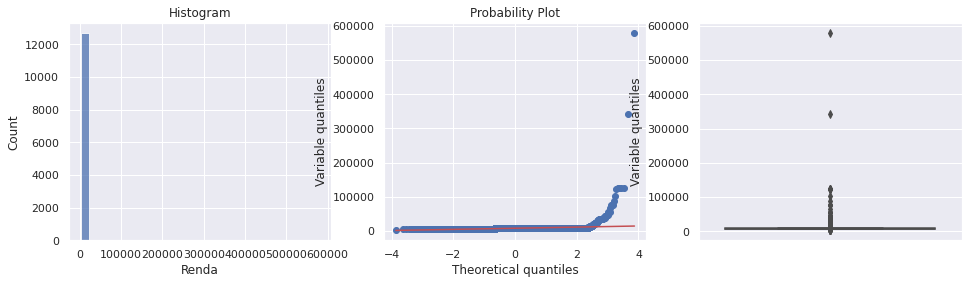

In [31]:
check_distribution(df_merged_id_no_dup, 'Renda')

In [32]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [33]:
Renda_upper_limit, Renda_lower_limit = find_skewed_boundaries(df_merged_id_no_dup, 'Renda', 1.5)
Renda_upper_limit, Renda_lower_limit

(9666.014, 5375.43)

In [34]:
outliers_Renda = np.where(df_merged_id_no_dup['Renda'] > Renda_upper_limit, True,
                       np.where(df_merged_id_no_dup['Renda'] < Renda_lower_limit, True, False))

In [35]:
Renda_trimmed = df_merged_id_no_dup.loc[~(outliers_Renda), ]

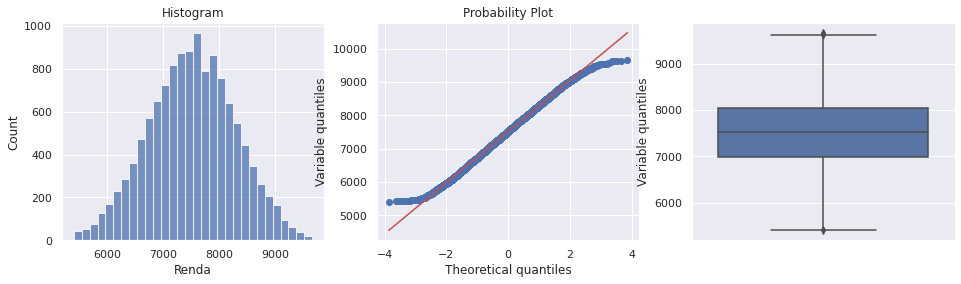

In [36]:
check_distribution(Renda_trimmed, 'Renda')

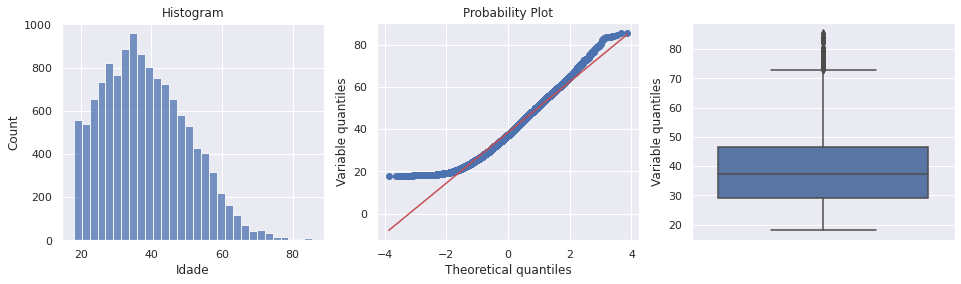

In [37]:
check_distribution(df_merged_id_no_dup, 'Idade')

In [38]:
labels_Idade = ['Idade_'+str(i) for i in range(1, 3)]

In [39]:
Idade_disc, intervals_Idade = pd.qcut(df_merged_id_no_dup['Idade'], 2, labels=labels_Idade, retbins=True, precision=3, duplicates='raise')

pd.concat([Idade_disc, df_merged_id_no_dup['Idade']], axis=1).head(10)

,Idade,Idade
0,Idade_2,42.993
1,Idade_1,26.373
2,Idade_2,46.977
3,Idade_1,24.311
4,Idade_1,28.896
5,Idade_2,37.735
6,Idade_2,38.629
7,Idade_2,61.835
8,Idade_2,37.715
9,Idade_1,29.022


In [40]:
intervals_Idade

array([18.009, 37.23 , 85.605])

In [41]:
df_merged_id_no_dup['Idade_disc'] = Idade_disc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
Idade_disc.value_counts()

Idade_1    6367
Idade_2    6366
Name: Idade, dtype: int64

In [43]:
labels_Renda = ['Renda_'+str(i) for i in range(1, 3)]

In [44]:
Renda_disc, intervals_Renda = pd.qcut(df_merged_id_no_dup['Renda'], 2, labels=labels_Renda, retbins=True, precision=3, duplicates='raise')

pd.concat([Renda_disc, df_merged_id_no_dup['Renda']], axis=1).head(10)

,Renda,Renda
0,Renda_1,4428.512
1,Renda_1,4489.930
2,Renda_1,4567.741
3,Renda_1,4592.132
4,Renda_1,4723.197
5,Renda_1,4842.616
6,Renda_1,4851.971
7,Renda_1,4901.463
8,Renda_1,4912.833
9,Renda_1,4963.967


In [45]:
intervals_Renda

array([  2312.   ,   7531.775, 580000.   ])

In [46]:
df_merged_id_no_dup['Renda_disc'] = Renda_disc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
Renda_disc.value_counts()

Renda_1    6372
Renda_2    6361
Name: Renda, dtype: int64

In [48]:
df_merged_id_no_dup.head()

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,Idade_disc,Renda_disc
0,71504.0,42.993,4428.512,NE,1.0,T,T,T,T,F,F,F,F,F,F,F,T,T,T,T,T,F,F,T,F,Idade_2,Renda_1
1,59751.0,26.373,4489.930,CO,0.0,T,T,T,T,F,F,F,F,F,F,F,T,T,T,T,T,F,F,F,T,Idade_1,Renda_1
2,11877.0,46.977,4567.741,CO,0.0,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,Idade_2,Renda_1
3,33701.0,24.311,4592.132,NE,0.0,F,F,F,F,T,T,T,T,T,T,T,F,F,F,F,F,F,F,F,F,Idade_1,Renda_1
4,62029.0,28.896,4723.197,SE,1.0,F,F,F,F,F,F,T,F,T,T,F,F,T,T,T,T,T,T,T,T,Idade_1,Renda_1


In [49]:
df_merged_id_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12733 entries, 0 to 13729
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   ID                                12733 non-null  float64 
 1   Idade                             12733 non-null  float64 
 2   Renda                             12733 non-null  float64 
 3   Regiao                            12733 non-null  object  
 4   Genero                            12733 non-null  float64 
 5   seguro auto                       12733 non-null  object  
 6   seguro vida Emp                   12733 non-null  object  
 7   seguro vida PF                    12733 non-null  object  
 8   Seguro Residencial                12733 non-null  object  
 9   Investimento Fundos_cambiais      12733 non-null  object  
 10  Investimento Fundos_commodities   12733 non-null  object  
 11  Investimento LCI                  12733 non-null  obje

In [50]:
categorical

['Regiao',
 'seguro auto',
 'seguro vida Emp',
 'seguro vida PF',
 'Seguro Residencial',
 'Investimento Fundos_cambiais',
 'Investimento Fundos_commodities',
 'Investimento LCI',
 'Investimento LCA',
 'Investimento Poupanca',
 'Investimento Fundos Multimercado',
 'Investimento Tesouro Direto',
 'Financiamento Casa',
 'Financiamento Carro',
 'Emprestimo _pessoal',
 'Emprestimo _consignado',
 'Emprestimo _limite_especial',
 'Emprestimo _educacao',
 'Emprestimo _viagem',
 'Investimento CDB',
 'Investimento Fundos']

In [51]:
for var in categorical:
    df_merged_id_no_dup[var].replace({"T": f"{var}", "F": np.nan}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [52]:
for var in discrete:
    df_merged_id_no_dup[var].replace({1.0: "1", 0.0: "0"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [53]:
df_merged_id_no_dup['Regiao'].replace({'N': 'N-NE', 'NE': 'N-NE', 'S': 'S-SE', 'SE': 'S-SE'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [54]:
df_merged_id_no_dup.head()

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,Idade_disc,Renda_disc
0,71504.0,42.993,4428.512,N-NE,1,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,NaN,NaN,Investimento CDB,NaN,Idade_2,Renda_1
1,59751.0,26.373,4489.930,CO,0,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,NaN,NaN,NaN,Investimento Fundos,Idade_1,Renda_1
2,11877.0,46.977,4567.741,CO,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idade_2,Renda_1
3,33701.0,24.311,4592.132,N-NE,0,NaN,NaN,NaN,NaN,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idade_1,Renda_1
4,62029.0,28.896,4723.197,S-SE,1,NaN,NaN,NaN,NaN,NaN,NaN,Investimento LCI,NaN,Investimento Poupanca,Investimento Fundos Multimercado,NaN,NaN,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,Idade_1,Renda_1


In [55]:
dataset = df_merged_id_no_dup.drop(['ID', 'Idade', 'Renda'], axis=1)

In [56]:
dataset.head()

,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,Idade_disc,Renda_disc
0,N-NE,1,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,NaN,NaN,Investimento CDB,NaN,Idade_2,Renda_1
1,CO,0,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,NaN,NaN,NaN,Investimento Fundos,Idade_1,Renda_1
2,CO,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idade_2,Renda_1
3,N-NE,0,NaN,NaN,NaN,NaN,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idade_1,Renda_1
4,S-SE,1,NaN,NaN,NaN,NaN,NaN,NaN,Investimento LCI,NaN,Investimento Poupanca,Investimento Fundos Multimercado,NaN,NaN,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,Idade_1,Renda_1


In [57]:
dataset_num = dataset.to_numpy()

In [58]:
dataset_num

array([['N-NE', '1', 'seguro auto', ..., nan, 'Idade_2', 'Renda_1'],
       ['CO', '0', 'seguro auto', ..., 'Investimento Fundos', 'Idade_1',
        'Renda_1'],
       ['CO', '0', nan, ..., nan, 'Idade_2', 'Renda_1'],
       ...,
       ['S-SE', '0', nan, ..., 'Investimento Fundos', 'Idade_1',
        'Renda_2'],
       ['CO', '1', nan, ..., nan, 'Idade_1', 'Renda_2'],
       ['N-NE', '0', nan, ..., 'Investimento Fundos', 'Idade_2',
        'Renda_2']], dtype=object)

In [59]:
new_array = []
inner_array = []

for i in range(dataset_num.shape[0]):
    inner_array = []
    for j in range(dataset_num.shape[1]):
        if not pd.isnull(dataset_num[i][j]):
            inner_array.append(dataset_num[i][j])
    new_array.append(inner_array)

In [60]:
new_array[:5]

[['N-NE',
  '1',
  'seguro auto',
  'seguro vida Emp',
  'seguro vida PF',
  'Seguro Residencial',
  'Financiamento Casa',
  'Financiamento Carro',
  'Emprestimo _pessoal',
  'Emprestimo _consignado',
  'Emprestimo _limite_especial',
  'Investimento CDB',
  'Idade_2',
  'Renda_1'],
 ['CO',
  '0',
  'seguro auto',
  'seguro vida Emp',
  'seguro vida PF',
  'Seguro Residencial',
  'Financiamento Casa',
  'Financiamento Carro',
  'Emprestimo _pessoal',
  'Emprestimo _consignado',
  'Emprestimo _limite_especial',
  'Investimento Fundos',
  'Idade_1',
  'Renda_1'],
 ['CO', '0', 'Idade_2', 'Renda_1'],
 ['N-NE',
  '0',
  'Investimento Fundos_cambiais',
  'Investimento Fundos_commodities',
  'Investimento LCI',
  'Investimento LCA',
  'Investimento Poupanca',
  'Investimento Fundos Multimercado',
  'Investimento Tesouro Direto',
  'Idade_1',
  'Renda_1'],
 ['S-SE',
  '1',
  'Investimento LCI',
  'Investimento Poupanca',
  'Investimento Fundos Multimercado',
  'Financiamento Carro',
  'Empresti

In [61]:
a = TransactionEncoder()
a_data = a.fit(new_array).transform(new_array)
df_trans = pd.DataFrame(a_data,columns=a.columns_)
df_trans

,0,1,CO,Emprestimo _consignado,Emprestimo _educacao,Emprestimo _limite_especial,Emprestimo _pessoal,Emprestimo _viagem,Financiamento Carro,Financiamento Casa,Idade_1,Idade_2,Investimento CDB,Investimento Fundos,Investimento Fundos Multimercado,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCA,Investimento LCI,Investimento Poupanca,Investimento Tesouro Direto,N-NE,Renda_1,Renda_2,S-SE,Seguro Residencial,seguro auto,seguro vida Emp,seguro vida PF
0,False,True,False,True,False,True,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,True
1,True,False,True,True,False,True,True,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True
2,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False
4,False,True,False,True,True,True,True,True,True,False,True,False,True,True,True,False,False,False,True,True,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12728,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,True,True,False,False,False
12729,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False
12730,True,False,False,True,True,True,True,True,False,False,True,False,True,True,False,False,False,True,True,True,False,False,False,True,True,False,False,False,False
12731,False,True,True,False,False,False,False,True,False,True,True,False,True,False,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False


In [62]:
frequent_itemsets = apriori(df_trans, use_colnames=True, min_support=0.05)
frequent_itemsets

,support,itemsets
0,0.453232,(0)
1,0.546768,(1)
2,0.172936,(CO)
3,0.160371,(Emprestimo _consignado)
4,0.160449,(Emprestimo _educacao)
...,...,...
2975,0.057881,"(Investimento Fundos, Investimento CDB, Empres..."
2976,0.061494,"(seguro auto, seguro vida Emp, seguro vida PF,..."
2977,0.050499,"(Investimento Fundos_commodities, Investimento..."
2978,0.057017,"(Investimento Fundos_commodities, Investimento..."


In [63]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Emprestimo _educacao),(Investimento CDB),0.160449,0.498390,0.133119,0.829662,1.664685,0.053152,2.944797
1,(seguro vida PF),(Seguro Residencial),0.247860,0.329223,0.214718,0.866286,2.631304,0.133116,5.016520
2,(seguro vida PF),(seguro auto),0.247860,0.280531,0.202309,0.816223,2.909566,0.132777,3.914904
3,(seguro vida PF),(seguro vida Emp),0.247860,0.341946,0.207100,0.835551,2.443517,0.122345,4.001576
4,"(0, Emprestimo _educacao)",(Investimento CDB),0.071468,0.498390,0.058745,0.821978,1.649267,0.023126,2.817686
...,...,...,...,...,...,...,...,...,...
4822,"(Investimento Fundos Multimercado, Investiment...","(Investimento Fundos_cambiais, Investimento Fu...",0.083641,0.130213,0.069740,0.833803,6.403384,0.058849,5.233465
4823,"(Investimento Fundos Multimercado, Investiment...","(Investimento Fundos_cambiais, Investimento Fu...",0.077280,0.140344,0.069740,0.902439,6.430194,0.058894,8.811474
4824,"(Investimento Fundos_cambiais, Investimento Fu...","(Investimento Fundos_commodities, Investimento...",0.081442,0.126522,0.069740,0.856316,6.768141,0.059436,6.079175
4825,"(Investimento Fundos Multimercado, Investiment...","(Investimento Fundos_cambiais, Investimento Fu...",0.080735,0.125108,0.069740,0.863813,6.904541,0.059639,6.424207


In [64]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

In [65]:
rules[ (rules['antecedent_len'] <= 5) &
       (rules['confidence'] >= 0.8) &
       (rules['support'] >= 0.1)].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Emprestimo _educacao),(Investimento CDB),0.160449,0.498390,0.133119,0.829662,1.664685,0.053152,2.944797,1
1,(seguro vida PF),(Seguro Residencial),0.247860,0.329223,0.214718,0.866286,2.631304,0.133116,5.016520,1
2,(seguro vida PF),(seguro auto),0.247860,0.280531,0.202309,0.816223,2.909566,0.132777,3.914904,1
3,(seguro vida PF),(seguro vida Emp),0.247860,0.341946,0.207100,0.835551,2.443517,0.122345,4.001576,1
5,"(seguro vida PF, 0)",(Seguro Residencial),0.115605,0.329223,0.102097,0.883152,2.682533,0.064037,5.740601,2


In [66]:
rules[ (rules['antecedent_len'] <= 5) &
       (rules['confidence'] >= 0.8) &
       (rules['support'] >= 0.1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 3297
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         227 non-null    object 
 1   consequents         227 non-null    object 
 2   antecedent support  227 non-null    float64
 3   consequent support  227 non-null    float64
 4   support             227 non-null    float64
 5   confidence          227 non-null    float64
 6   lift                227 non-null    float64
 7   leverage            227 non-null    float64
 8   conviction          227 non-null    float64
 9   antecedent_len      227 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 19.5+ KB


In [67]:
r = rules[ (rules['antecedent_len'] <= 5) &
       (rules['confidence'] >= 0.8) &
       (rules['support'] >= 0.1)][['antecedents', 'confidence', 'support', 'consequents']].to_numpy()

In [68]:
r

array([[frozenset({'Emprestimo _educacao'}), 0.8296622613803231,
        0.13311866802795885, frozenset({'Investimento CDB'})],
       [frozenset({'seguro vida PF'}), 0.8662864385297845,
        0.21471766276604098, frozenset({'Seguro Residencial'})],
       [frozenset({'seguro vida PF'}), 0.8162230671736376,
        0.2023089609675646, frozenset({'seguro auto'})],
       [frozenset({'seguro vida PF'}), 0.8355513307984791,
        0.20709966229482446, frozenset({'seguro vida Emp'})],
       [frozenset({'seguro vida PF', '0'}), 0.8831521739130435,
        0.10209691353176785, frozenset({'Seguro Residencial'})],
       [frozenset({'1', 'seguro vida PF'}), 0.8515439429928741,
        0.11262074923427315, frozenset({'Seguro Residencial'})],
       [frozenset({'1', 'seguro vida PF'}), 0.8159144893111638,
        0.1079085839943454, frozenset({'seguro auto'})],
       [frozenset({'1', 'seguro vida PF'}), 0.8283847980997624,
        0.10955784182832011, frozenset({'seguro vida Emp'})],
      

In [69]:
for i in r:
    for j in labels_Idade+labels_Renda+list(dataset['Regiao'].unique()):
        if j in i[0]:
            print('Idade, Renda, Regiao - Related', i)

Idade, Renda, Regiao - Related [frozenset({'seguro vida PF', 'Idade_1'}) 0.8700315457413249
 0.10830126443100604 frozenset({'Seguro Residencial'})]
Idade, Renda, Regiao - Related [frozenset({'seguro vida PF', 'Idade_1'}) 0.8214511041009463
 0.1022539857064321 frozenset({'seguro auto'})]
Idade, Renda, Regiao - Related [frozenset({'seguro vida PF', 'Idade_1'}) 0.8334384858044164
 0.10374617136574256 frozenset({'seguro vida Emp'})]
Idade, Renda, Regiao - Related [frozenset({'seguro vida PF', 'Idade_2'}) 0.8625079567154679
 0.10641639833503495 frozenset({'Seguro Residencial'})]
Idade, Renda, Regiao - Related [frozenset({'seguro vida PF', 'Idade_2'}) 0.8109484404837684
 0.1000549752611325 frozenset({'seguro auto'})]
Idade, Renda, Regiao - Related [frozenset({'seguro vida PF', 'Idade_2'}) 0.8376830044557606
 0.10335349092908191 frozenset({'seguro vida Emp'})]
Idade, Renda, Regiao - Related [frozenset({'seguro vida PF', 'Renda_1'}) 0.858736059479554
 0.10885101704233095 frozenset({'Seguro Res

In [72]:
ans_df = pd.read_csv('desafio-3-2021/assets/data/ANSWERS.csv')

In [73]:
ans_df['Idade_disc'] = pd.cut(x = ans_df['Idade'], bins=intervals_Idade, labels=labels_Idade)
ans_df['Renda_disc'] = pd.cut(x = ans_df['Renda'], bins=intervals_Renda, labels=labels_Renda)

In [74]:
ans_df.head()

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,RECOMMENDATION_1,CONFIDENCE_1,RECOMMENDATION_2,CONFIDENCE_2,RECOMMENDATION_3,CONFIDENCE_3,Idade_disc,Renda_disc
0,1004.0,40.685,8474.687,CO,1.0,F,F,F,F,F,T,F,F,F,T,F,F,F,F,F,F,T,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN,Idade_2,Renda_2
1,1028.0,56.693,7996.353,SE,0.0,F,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,Idade_2,Renda_2
2,1034.0,49.413,8624.335,NE,0.0,T,T,T,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN,Idade_2,Renda_2
3,1035.0,22.764,6885.196,S,1.0,F,F,F,T,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,Idade_1,Renda_1
4,1039.0,22.059,7749.965,NE,1.0,T,T,T,T,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,Idade_1,Renda_2


In [75]:
ans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   ID                                13730 non-null  float64 
 1   Idade                             13730 non-null  float64 
 2   Renda                             13730 non-null  float64 
 3   Regiao                            13730 non-null  object  
 4   Genero                            13730 non-null  float64 
 5   seguro auto                       13730 non-null  object  
 6   seguro vida Emp                   13730 non-null  object  
 7   seguro vida PF                    13730 non-null  object  
 8   Seguro Residencial                13730 non-null  object  
 9   Investimento Fundos_cambiais      13730 non-null  object  
 10  Investimento Fundos_commodities   13730 non-null  object  
 11  Investimento LCI                  13730 non-null  obje

In [76]:
for var in categorical:
    ans_df[var].replace({"T": f"{var}", "F": np.nan}, inplace=True)

In [77]:
for var in discrete:
    ans_df[var].replace({1.0: "1", 0.0: "0"}, inplace=True)

In [78]:
ans_df['Regiao'].replace({'N': 'N-NE', 'NE': 'N-NE', 'S': 'S-SE', 'SE': 'S-SE'}, inplace=True)

In [79]:
ans_df.head()

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,RECOMMENDATION_1,CONFIDENCE_1,RECOMMENDATION_2,CONFIDENCE_2,RECOMMENDATION_3,CONFIDENCE_3,Idade_disc,Renda_disc
0,1004.0,40.685,8474.687,CO,1,NaN,NaN,NaN,NaN,NaN,Investimento Fundos_commodities,NaN,NaN,NaN,Investimento Fundos Multimercado,NaN,NaN,NaN,NaN,NaN,NaN,Emprestimo _educacao,NaN,Investimento CDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idade_2,Renda_2
1,1028.0,56.693,7996.353,S-SE,0,NaN,NaN,NaN,NaN,Investimento Fundos_cambiais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idade_2,Renda_2
2,1034.0,49.413,8624.335,N-NE,0,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Investimento CDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idade_2,Renda_2
3,1035.0,22.764,6885.196,S-SE,1,NaN,NaN,NaN,Seguro Residencial,NaN,NaN,NaN,Investimento LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idade_1,Renda_1
4,1039.0,22.059,7749.965,N-NE,1,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,NaN,NaN,NaN,Investimento LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idade_1,Renda_2


In [80]:
ans_dataset = ans_df.drop(['ID', 'Idade', 'Renda', 'RECOMMENDATION_1', 'CONFIDENCE_1', 'RECOMMENDATION_2', 'CONFIDENCE_2', 'RECOMMENDATION_3', 'CONFIDENCE_3'], axis=1)

In [81]:
ans_dataset.head()

,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,Idade_disc,Renda_disc
0,CO,1,NaN,NaN,NaN,NaN,NaN,Investimento Fundos_commodities,NaN,NaN,NaN,Investimento Fundos Multimercado,NaN,NaN,NaN,NaN,NaN,NaN,Emprestimo _educacao,NaN,Investimento CDB,NaN,Idade_2,Renda_2
1,S-SE,0,NaN,NaN,NaN,NaN,Investimento Fundos_cambiais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idade_2,Renda_2
2,N-NE,0,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Investimento CDB,NaN,Idade_2,Renda_2
3,S-SE,1,NaN,NaN,NaN,Seguro Residencial,NaN,NaN,NaN,Investimento LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idade_1,Renda_1
4,N-NE,1,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,NaN,NaN,NaN,Investimento LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idade_1,Renda_2


In [82]:
ans_dataset_num = ans_dataset.to_numpy()

In [83]:
ans_dataset_num

array([['CO', '1', nan, ..., nan, 'Idade_2', 'Renda_2'],
       ['S-SE', '0', nan, ..., nan, 'Idade_2', 'Renda_2'],
       ['N-NE', '0', 'seguro auto', ..., nan, 'Idade_2', 'Renda_2'],
       ...,
       ['S-SE', '1', nan, ..., nan, 'Idade_1', 'Renda_1'],
       ['N-NE', '0', 'seguro auto', ..., nan, 'Idade_2', 'Renda_2'],
       ['N-NE', '1', 'seguro auto', ..., nan, 'Idade_2', 'Renda_2']],
      dtype=object)

In [84]:
new_ans_dataset_num = []
inner_ans_dataset_num = []

for i in range(ans_dataset_num.shape[0]):
    inner_ans_dataset_num = []
    for j in range(ans_dataset_num.shape[1]):
        if not pd.isnull(ans_dataset_num[i][j]):
            inner_ans_dataset_num.append(ans_dataset_num[i][j])
    new_ans_dataset_num.append(inner_ans_dataset_num)

In [85]:
new_ans_dataset_num[:5]

[['CO',
  '1',
  'Investimento Fundos_commodities',
  'Investimento Fundos Multimercado',
  'Emprestimo _educacao',
  'Investimento CDB',
  'Idade_2',
  'Renda_2'],
 ['S-SE', '0', 'Investimento Fundos_cambiais', 'Idade_2', 'Renda_2'],
 ['N-NE',
  '0',
  'seguro auto',
  'seguro vida Emp',
  'seguro vida PF',
  'Seguro Residencial',
  'Investimento CDB',
  'Idade_2',
  'Renda_2'],
 ['S-SE', '1', 'Seguro Residencial', 'Investimento LCA', 'Idade_1', 'Renda_1'],
 ['N-NE',
  '1',
  'seguro auto',
  'seguro vida Emp',
  'seguro vida PF',
  'Seguro Residencial',
  'Investimento LCA',
  'Idade_1',
  'Renda_2']]

In [86]:
def check_duplicates(past_consequents, current_consequent):
    for past_consequent in past_consequents:
        if current_consequent in past_consequent:
            return True
    return False

def remove_duplicates(consequents):
    new_consequents = []
    duplicated_consequents = []

    for i in range(len(consequents)):
        if not check_duplicates(duplicated_consequents, consequents[i]['consequent']):
            duplicated_consequents.append(consequents[i]['consequent'])
            new_consequents.append(consequents[i])

    return new_consequents

def compare_antecedents(row , antecedents):
    consequents = []
    consequents_row = []

    for antecedent in antecedents:
        # Checks if row has all the antecedents
        if len(list(set(row) & set(antecedent[0]))) == len(antecedent[0]) and list(antecedent[3])[0] not in row:
            consequents.append({'row': row,'antecedent': list(antecedent[0]),'consequent': list(antecedent[3])[0], 'confidence': float(antecedent[1])})

    sorted_consequents = sorted(consequents, key=lambda d: d['confidence'], reverse=True)
    sorted_consequents_no_dup = remove_duplicates(sorted_consequents)
    
    for i in range(len(sorted_consequents_no_dup[:3])):
        consequents_row.append(sorted_consequents_no_dup[i]['consequent'])
        consequents_row.append(sorted_consequents_no_dup[i]['confidence'])

    for i in range(3 - len(sorted_consequents_no_dup[:3])):
        consequents_row.append(np.nan)
        consequents_row.append(np.nan)

    return consequents_row

In [87]:
ans_consequents = []

for i in tqdm.tqdm(new_ans_dataset_num):
    ans_consequents.append(compare_antecedents(i, r))

100%|██████████| 13730/13730 [00:04<00:00, 2749.33it/s]


In [88]:
ans_consequents

[['Investimento Fundos',
  0.8920353982300885,
  'Emprestimo _viagem',
  0.8737463126843658,
  nan,
  nan],
 [nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan],
 ['Investimento LCI',
  0.8272564255827853,
  'Investimento Fundos_cambiais',
  0.8230723251643753,
  nan,
  nan],
 ['Investimento Fundos_commodities',
  0.8285198555956679,
  'Investimento LCI',
  0.8194945848375451,
  nan,
  nan],
 ['seguro vida PF',
  0.9072225484439225,
  'seguro auto',
  0.8984145625366999,
  nan,
  nan],
 [nan, nan, nan, nan, nan, nan],
 ['seguro auto', 0.9881481481481481, nan, nan, nan, nan],
 ['Investimento Fundos_commodities',
  0.8290229885057471,
  'Investimento LCI',
  0.8232758620689656,
  'Investimento Poupanca',
  0.8199233716475096],
 [nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan],
 ['Investimento CDB', 0.8028727092620109, nan, nan, nan

In [89]:
df_ans_consequents = pd.DataFrame(ans_consequents, columns =['RECOMMENDATION_1', 'CONFIDENCE_1', 'RECOMMENDATION_2', 'CONFIDENCE_2', 'RECOMMENDATION_3', 'CONFIDENCE_3'])

In [90]:
df_ans_consequents.head(20)

,RECOMMENDATION_1,CONFIDENCE_1,RECOMMENDATION_2,CONFIDENCE_2,RECOMMENDATION_3,CONFIDENCE_3
0,Investimento Fundos,0.892035,Emprestimo _viagem,0.873746,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,Investimento LCI,0.827256,Investimento Fundos_cambiais,0.823072,NaN,NaN
7,Investimento Fundos_commodities,0.828520,Investimento LCI,0.819495,NaN,NaN
8,seguro vida PF,0.907223,seguro auto,0.898415,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
final_ans_df = pd.read_csv('desafio-3-2021/assets/data/ANSWERS.csv')

In [92]:
final_ans_df = final_ans_df.drop(['RECOMMENDATION_1', 'CONFIDENCE_1', 'RECOMMENDATION_2', 'CONFIDENCE_2', 'RECOMMENDATION_3', 'CONFIDENCE_3'], axis=1)

In [93]:
# concatenating df3 and df4 along columns
final_ans_df = pd.concat([final_ans_df, df_ans_consequents], axis=1)

In [94]:
final_ans_df.head()

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,RECOMMENDATION_1,CONFIDENCE_1,RECOMMENDATION_2,CONFIDENCE_2,RECOMMENDATION_3,CONFIDENCE_3
0,1004.0,40.685,8474.687,CO,1.0,F,F,F,F,F,T,F,F,F,T,F,F,F,F,F,F,T,F,T,F,Investimento Fundos,0.892035,Emprestimo _viagem,0.873746,NaN,NaN
1,1028.0,56.693,7996.353,SE,0.0,F,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
2,1034.0,49.413,8624.335,NE,0.0,T,T,T,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN
3,1035.0,22.764,6885.196,S,1.0,F,F,F,T,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
4,1039.0,22.059,7749.965,NE,1.0,T,T,T,T,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
final_ans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                13730 non-null  float64
 1   Idade                             13730 non-null  float64
 2   Renda                             13730 non-null  float64
 3   Regiao                            13730 non-null  object 
 4   Genero                            13730 non-null  float64
 5   seguro auto                       13730 non-null  object 
 6   seguro vida Emp                   13730 non-null  object 
 7   seguro vida PF                    13730 non-null  object 
 8   Seguro Residencial                13730 non-null  object 
 9   Investimento Fundos_cambiais      13730 non-null  object 
 10  Investimento Fundos_commodities   13730 non-null  object 
 11  Investimento LCI                  13730 non-null  object 
 12  Inve

In [96]:
final_ans_df.to_csv('MY_ANSWERS_DEF_3.csv',index=False)